# Avant de commencer, veuillez installer les packages nécessaires via le code suivant :
*pip install -r requirements.txt*

*pip install pandas numpy matplotlib seaborn scikit-lear*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from matplotlib.colors import LinearSegmentedColormap
from sklearn.metrics import r2_score


# Chargement des données (provenant du csv)

In [1]:
df = pd.read_csv("airbnb_data.csv")

# print("le fichier contient", df.shape[0], "lignes et", df.shape[1], "colonnes")
df 

NameError: name 'pd' is not defined

In [ ]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [ ]:
df.beds.isnull().sum()

np.int64(31087)

In [ ]:
df.isnull().mean().sort_values(ascending = False)

neighbourhood_group_cleansed                    1.000000
calendar_updated                                1.000000
host_neighbourhood                              0.646615
host_about                                      0.565225
neighborhood_overview                           0.495820
                                                  ...   
instant_bookable                                0.000000
calculated_host_listings_count                  0.000000
calculated_host_listings_count_entire_homes     0.000000
calculated_host_listings_count_private_rooms    0.000000
calculated_host_listings_count_shared_rooms     0.000000
Length: 75, dtype: float64

In [ ]:
df[['neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed']].isnull().sum()
# neighbourhood_cleansed à aucune valeurs manquantes, nous pouvons alors le garder lors de l'analyse de données

neighbourhood                   45135
neighbourhood_cleansed              0
neighbourhood_group_cleansed    91031
dtype: int64

In [ ]:
df.beds.mean()

np.float64(1.7859835846790337)

In [ ]:
df.property_type.value_counts()

property_type
Entire rental unit             76168
Private room in rental unit     5839
Entire condo                    2526
Room in boutique hotel          1197
Room in hotel                   1135
                               ...  
Tower                              1
Shared room in guest suite         1
Private room in cave               1
Camper/RV                          1
Private room in bungalow           1
Name: count, Length: 68, dtype: int64

In [ ]:
df.beds.fillna(1, inplace = True)

C:\Users\iPhone de Gaëlle\AppData\Local\Temp\ipykernel_18812\4147998425.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.beds.fillna(1, inplace = True)


# Sélection et nettoyage des données

In [ ]:
df = df[['name', 'latitude', 'longitude', 'room_type', 'price',
         'minimum_nights', 'number_of_reviews', 'accommodates', 'bedrooms', 'beds',
         'review_scores_rating', 'host_is_superhost', 'neighbourhood_cleansed', 'property_type', 'reviews_per_month']]

df = df.drop_duplicates()
df = df.dropna()
df['price'] = df['price'].replace(r'[\$,]', '', regex=True).astype(float)

# Analyse des prix et des nuits minimums (avec valeurs aberrantes)


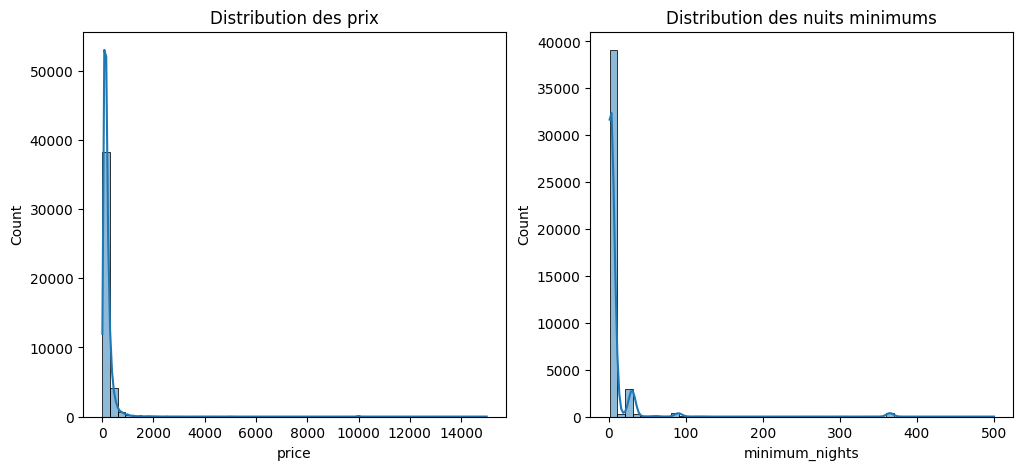

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribution des prix")

plt.subplot(1,2,2)
sns.histplot(df['minimum_nights'], bins=50, kde=True)
plt.title("Distribution des nuits minimums")
plt.show()

# Analyse des prix dans tout Paris

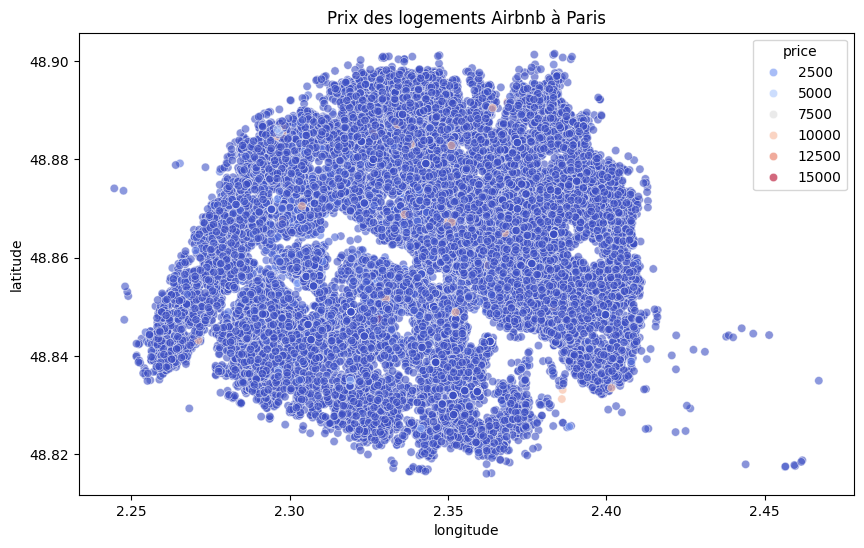

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='price', palette="coolwarm", alpha=0.6)
plt.title("Prix des logements Airbnb à Paris")
plt.show()

# Analyse des prix par arrondissement

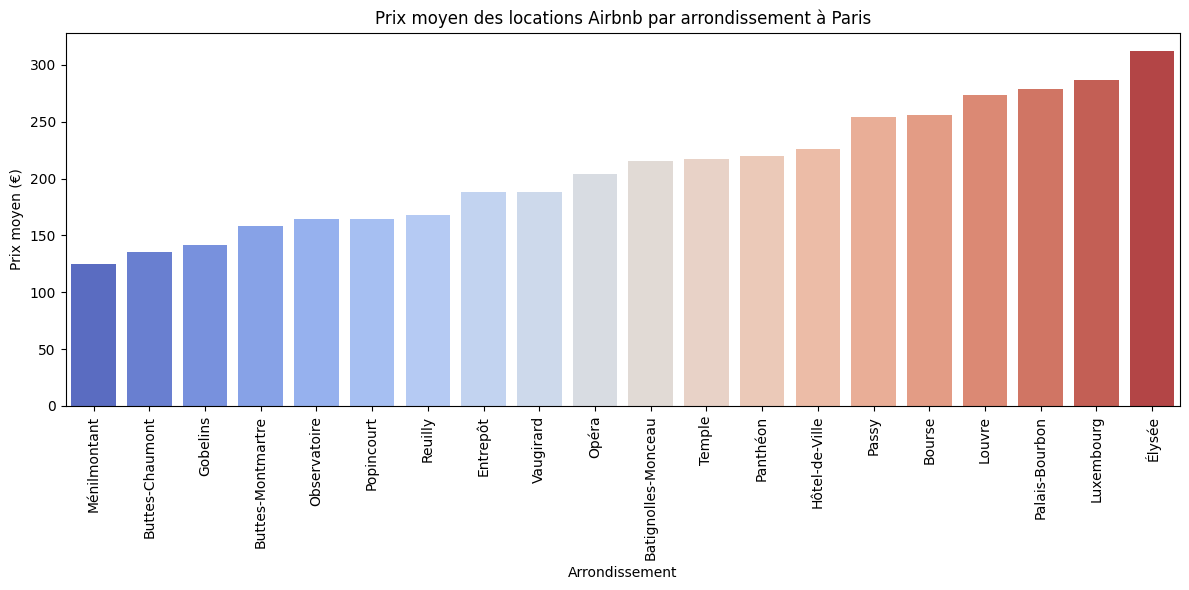

In [ ]:
plt.figure(figsize=(12,6))
arrondissement_price = df.groupby('neighbourhood_cleansed')['price'].mean().sort_values()
sns.barplot(x=arrondissement_price.index, y=arrondissement_price.values, hue=arrondissement_price.index, palette="coolwarm", legend=False)
plt.xticks(rotation=90)
plt.xlabel("Arrondissement")
plt.ylabel("Prix moyen (€)")
plt.title("Prix moyen des locations Airbnb par arrondissement à Paris")
plt.tight_layout() 
plt.show()

# Analyse des prix moyens par type de propriété


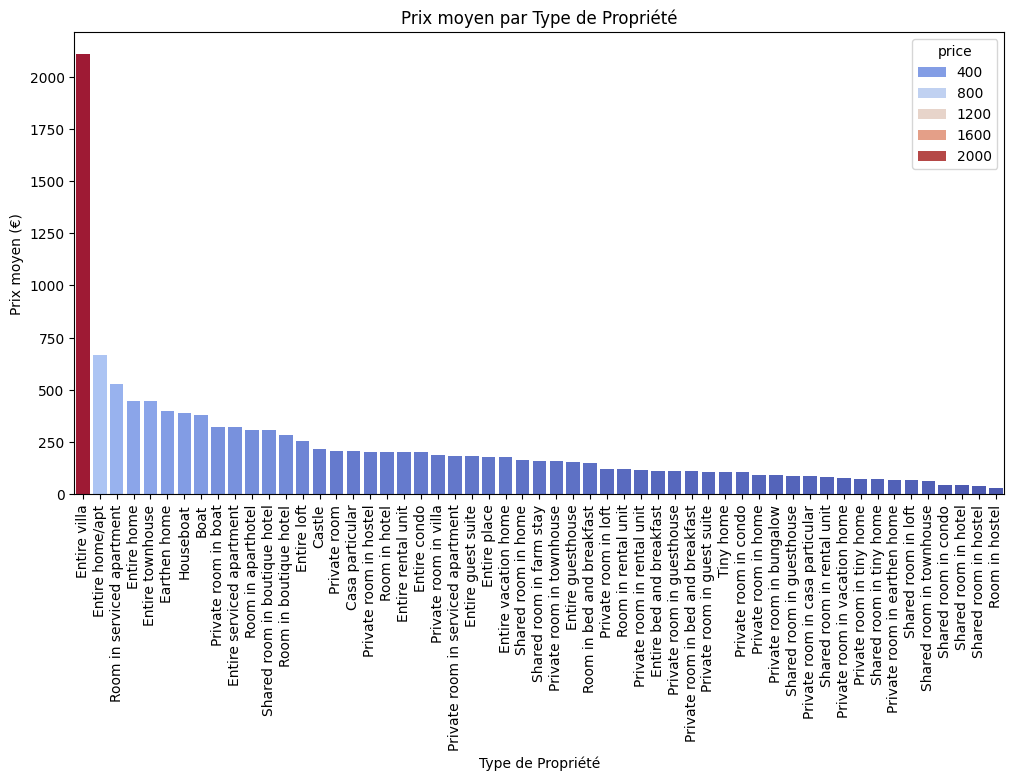

In [ ]:
prix_par_type = df.groupby('property_type')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=prix_par_type.index, y=prix_par_type.values, hue=prix_par_type, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Type de Propriété")
plt.ylabel("Prix moyen (€)")
plt.title("Prix moyen par Type de Propriété")
plt.show()

Nombre de valeurs aberrantes pour 'price' : 3274
Nombre de données aberrantes supprimés : 3274


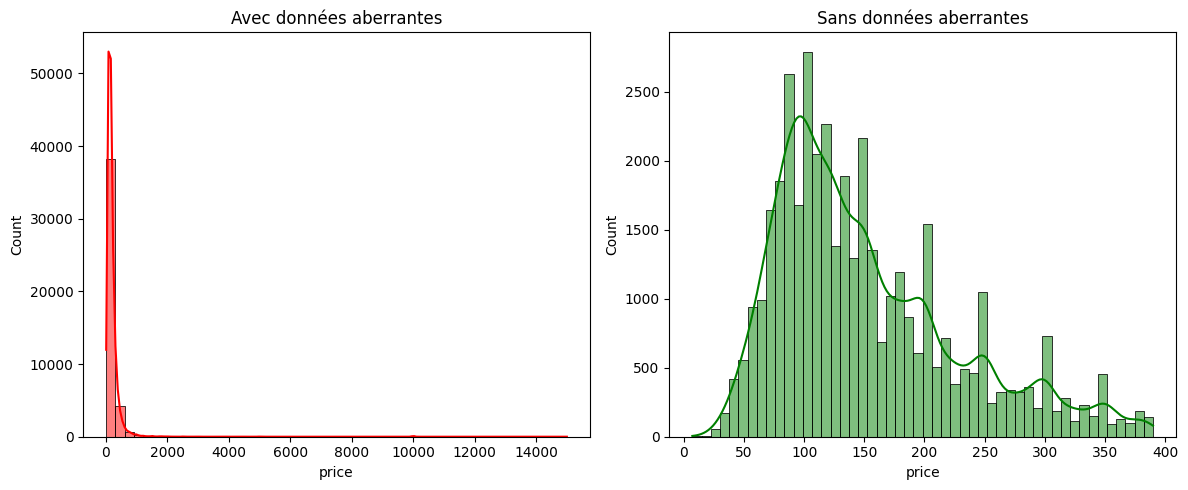

In [ ]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
dt_aber = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(f"Nombre de valeurs aberrantes pour 'price' : {dt_aber.shape[0]}")
# print(dt_aber[['name', 'price']])

# suppression valeurs aberrantes
df_clean = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

dt_aber_count = len(df) - len(df_clean)
print(f"Nombre de données aberrantes supprimés : {dt_aber_count}")

# ava,nt après
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['price'], bins=50, kde=True, color='red')
plt.title("Avec données aberrantes")

plt.subplot(1, 2, 2)
sns.histplot(df_clean['price'], bins=50, kde=True, color='green')
plt.title("Sans données aberrantes")

plt.tight_layout()
plt.show()

# Régression Linéaire Simple

Coefficient de détermination R² : 0.272


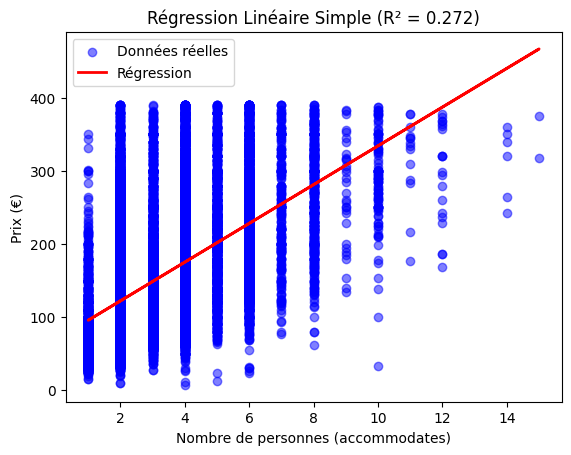

In [ ]:
X = df_clean[['accommodates']]
y = df_clean['price']

model_simple = LinearRegression()
model_simple.fit(X, y)

# predictio
y_pred = model_simple.predict(X)

# coef en R²
r2 = r2_score(y, y_pred)
print(f"Coefficient de détermination R² : {r2:.3f}")

plt.scatter(X, y, color='blue', alpha=0.5, label='Données réelles')
plt.plot(X, y_pred, color='red', linewidth=2, label='Régression')
plt.xlabel("Nombre de personnes (accommodates)")
plt.ylabel("Prix (€)")
plt.title(f"Régression Linéaire Simple (R² = {r2:.3f})")
plt.legend()
plt.show()

Coefficient de détermination R² : 0.395


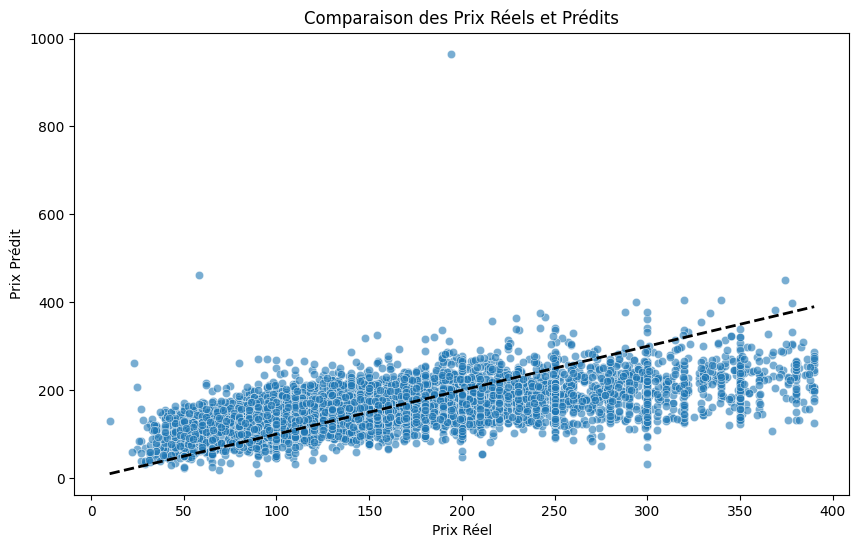

In [ ]:
df = df[(df['price'] >= Q1 - 1.5*IQR) & (df['price'] <= Q3 + 1.5*IQR)]

# conversion
df = pd.get_dummies(df, columns=['room_type', 'host_is_superhost', 'property_type'], drop_first=True)

# pertinents à prendre : nombre de pers, nombre chambres, nombre  lits, note avis etc
features = ['accommodates', 'bedrooms', 'beds', 'review_scores_rating', 
            'number_of_reviews', 'minimum_nights', 'latitude', 'longitude'] + \
           [col for col in df.columns if col.startswith('room_type_') or 
            col.startswith('host_is_superhost_') or col.startswith('property_type_')]



X = df[features]
y = df['price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
# coef en R²
r2 = r2_score(y_test, y_pred)
print(f"Coefficient de détermination R² : {r2:.3f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Prix Réel')
plt.ylabel('Prix Prédit')
plt.title('Comparaison des Prix Réels et Prédits')
plt.show()

# Régression Linéaire Multiple

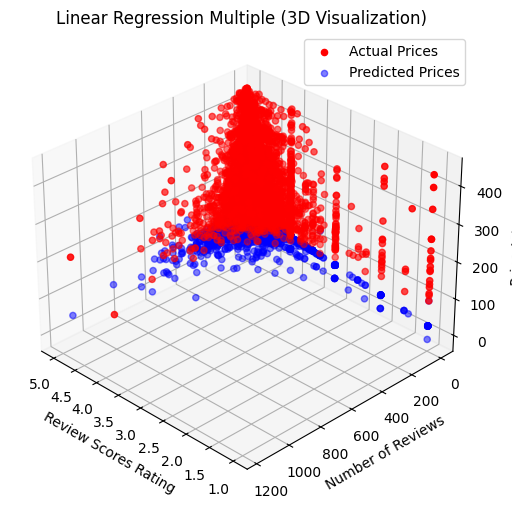

In [ ]:
# Check if the required columns exist in the DataFrame
required_columns = ['review_scores_rating', 'price', 'number_of_reviews'] 
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    # Clean the 'price' column by removing the dollar sign and converting to float
    df['price'] = df['price'].replace(r'[\$,]', '', regex=True).astype(float)

    # Proceed with one-hot encoding for room type if it's not already encoded
    if 'room_type' in df.columns:
        df = pd.get_dummies(df, columns=['room_type'], drop_first=True)  # One-hot encoding room_type

    # Proceed with dropping rows with missing values
    df_clean = df.dropna(subset=required_columns)

    # Splitting the dataset into training and testing sets
    X = df_clean[['review_scores_rating', 'number_of_reviews'] + 
                 [col for col in df_clean.columns if col.startswith("room_type_")]]  # Using one-hot encoded room types
    y = df_clean['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Training the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # 3D Visualization of Actual vs Predicted Prices
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot of actual prices
    ax.scatter(X_test['review_scores_rating'], X_test['number_of_reviews'], y_test +50 , color='red', label='Actual Prices')

    # Scatter plot of predicted prices
    y_pred = model.predict(X_test)
    ax.scatter(X_test['review_scores_rating'], X_test['number_of_reviews'], y_pred -50 , color='blue', alpha=0.5, label='Predicted Prices')

    ax.view_init(elev=30, azim=135)

    # Labels
    ax.set_xlabel("Review Scores Rating")
    ax.set_ylabel("Number of Reviews")
    ax.set_zlabel("Price (€)")
    ax.set_title("Linear Regression Multiple (3D Visualization)")

    plt.legend()
    plt.show()